# WSI
## Raport z ćwiczenia laboratoryjnego nr 6
### Jan Kuc, 303753

### 1. Cel eksperymentów

Zadanie polega na implementacji algorytmu Q-learningu, a takze obiektu agenta rozwiązującego problem **Taxi** z pakietu *gym*.

### 2. Decyzje projektowe i opis implementacji

Implementację postanowiono podzielić na klasę **Agent**, której parametry inicjalizujące to:
- alpha - współczynnik szybkości uczenia,
- gamma - współczynnik uczenia, który określa jak ważne są nagrody w przyszłości w stosunku do nagród teraźniejszych,
- epsilon - współczynnik uzywany do określenia prawdopodobieństwa wylosowania najlepszej akcji podczas eksploracji,
- env - środowisko uczenia agenta.

Q-tablica jest równiez atrybutem klasy Agent. Zapisywane są w niej i aktualizowane na podstawie kolejnych doświadczeń agenta, przewidywane wartości nagród za podjęcie konkretnej akcji w danym stanie. W omawianym projekcie jest ona inicjalizowana zerami i ma wymiary: **liczba mozliwych stanow X liczba mozliwych akcji**.

W klasie Agent zawarto następujące metody:
- *update_qtable* - do aktualizwania Q-tablicy,
- *explore* - do eksplorowania środowiska zgodnie ze strategią eps-zachłanną,
- *choose_action* - do wybory akcji w przypadku, kiedy agent nie jest wykorzystywany do treningu a do ewaluacji,
- *__best_action* - prywatna funkcja do wyboru losowej z najlepszych akcji, w przypadku gdy kilka z nich jest ocenionych tak samo dobrze.

Stworzona została takze klasa QLearningSolver, którą inicjalizuje się poprzez przekazanie obiektu typu Agent, a takze nagrody za wykonanie nielegalnego, z perspektywy środowiska, kroku, by rozwiązanie było uniwersalne dla wielu środowisk, a nie uzaleznione od omawianego problemu Taxi.

Metody dostępne w utworzonym solverze to:
- *train* - wykorzystywana do treningu działań agenta w danym środowisku, gdzie na podstawie eksplorowanych akcji wykonuje on kroki i aktualizuje swoją Q-tablicę,
- *solve* - wykorzystywana przy ewaluacji modelu - testuje aktualną wiedzę agenta, wykonując najlepsze lub losowe kroki (zaleznie od parametru wejściowego *random_action*) i zliczając wykonane kroki, nielegalne kroki oraz sumując osiąganą wartość nagród. Ze względu na to, ze funkcja moze byc uruchamiana dla agenta o bardzo ograniczonej wiedzy na temat środowiska, dodano parametr *max_iters*, ktory zabezpiecza przed losowym błądzeniem i utknięciem w pętli. Na koniec zwracana jest takze informacja o tym, czy agentowi udało się ukończyć zadanie;
- *evaluate* - do przeprowadzenia periodycznej ewaluacji wiedzy agenta. Dla ustalonych liczb: iteracji, ewaluacji oraz epizodów w jednej ewaluacji, prowadzony jest trening agenta do numeru iteracji, w której uczenie ma być zatrzymane na potrzebę ewaluacji. Periodyczne "miejsca" stopu liczone są według wzoru: liczba iteracji / liczba ewaluacji. Po zatrzymaniu agent przechodzi przez określoną liczbę epizodów posiadając wyuczoną, do tego momentu, wiedzę. W trakcie ewaluacji zliczane są średnie wykonanych kroków, nielegalnych kroków, otrzymanych nagród dla kazdego dla epizodów, a takze procent epizodów zakończonych sukcesem.


### 3. Eksperymenty

Załadowanie wykorzystywanych bibliotek i klas agenta oraz solvera

In [1]:
import gymnasium as gym
import matplotlib.pyplot as plt
import sys
sys.path.append("../src")
from agent import Agent
from my_solver import QLearningSolver

Ustawienie parametrów uczenia agenta:

In [2]:
ALPHA = 0.2
GAMMA = 0.5
EPSILON = 0.1

Wczytanie środowiska problemu:

In [3]:
taxi_env = gym.make("Taxi-v3").env

Utworzenie instancji agenta:

In [4]:
taxi_agent = Agent(alpha=ALPHA, gamma=GAMMA, eps=EPSILON, env=taxi_env)

Utworzenie instancji solvera:

In [5]:
taxi_solver = QLearningSolver(agent=taxi_agent, illegal_step_reward=-10)

Ustawienie parametrów do treningu i ewaluacji:

In [6]:
NUM_OF_ITERATIONS = 100000
NUM_OF_EVALUATIONS = 40
NUM_OF_EPISODES_FOR_EVALUATION = 100
MAX_SOLVE_ITERATIONS = 500

Przeprowadzenie ewaluacji z treningiem

In [7]:
(
    eval_points,
    avg_steps,
    avg_scores,
    avg_illegal_steps,
    solved_ratios,
) = taxi_solver.evaluate(
    n_iters=NUM_OF_ITERATIONS,
    n_evals=NUM_OF_EVALUATIONS,
    n_episodes=NUM_OF_EPISODES_FOR_EVALUATION,
    max_solve_iters=MAX_SOLVE_ITERATIONS,
)

---------- Evaluation ----------
Learning period iterations: 2500
Number of evalutaions: 40
Evaluation episodes: 100

---------- Evaluation stop #1 at iteration #1 ----------
Episode #1: steps: 11, score: 10, illegal_steps: 0, solved: True
Episode #2: steps: 13, score: 8, illegal_steps: 0, solved: True
Episode #3: steps: 501, score: -501, illegal_steps: 0, solved: False
Episode #4: steps: 12, score: 9, illegal_steps: 0, solved: True
Episode #5: steps: 13, score: 8, illegal_steps: 0, solved: True
Episode #6: steps: 13, score: 8, illegal_steps: 0, solved: True
Episode #7: steps: 15, score: 6, illegal_steps: 0, solved: True
Episode #8: steps: 14, score: 7, illegal_steps: 0, solved: True
Episode #9: steps: 12, score: 9, illegal_steps: 0, solved: True
Episode #10: steps: 501, score: -501, illegal_steps: 0, solved: False
Episode #11: steps: 15, score: 6, illegal_steps: 0, solved: True
Episode #12: steps: 501, score: -501, illegal_steps: 0, solved: False
Episode #13: steps: 501, score: -501, 

Prezentacja przebiegów liczby kroków, sum nagród, nielegalnych kroków i stosunku zadań zakończonych sukcesem do liczby wszystkich zadań:

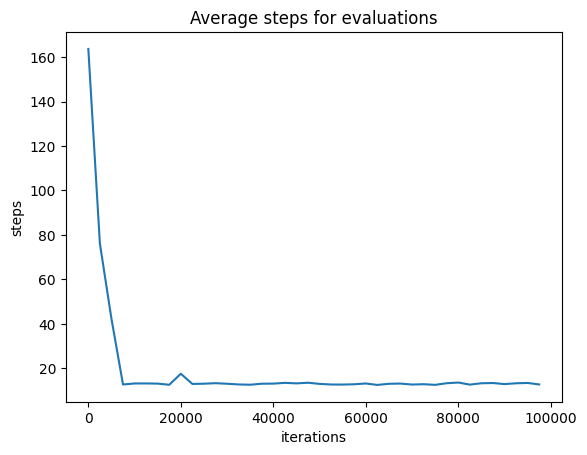

In [8]:
plt.figure()
plt.plot(eval_points, avg_steps)
plt.title("Average steps for evaluations")
plt.xlabel("iterations")
plt.ylabel("steps")
plt.show()

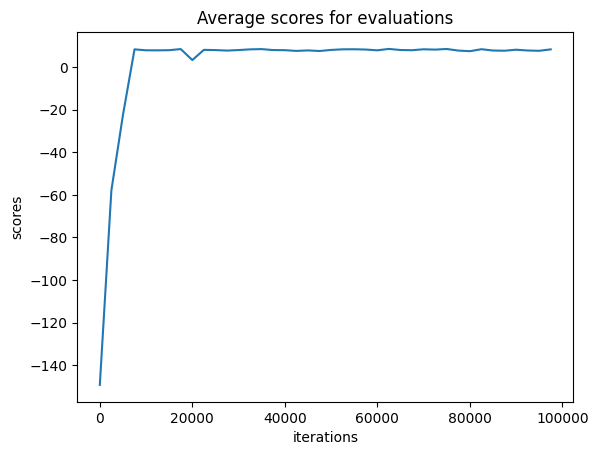

In [9]:
plt.figure()
plt.plot(eval_points, avg_scores)
plt.title("Average scores for evaluations")
plt.xlabel("iterations")
plt.ylabel("scores")
plt.show()

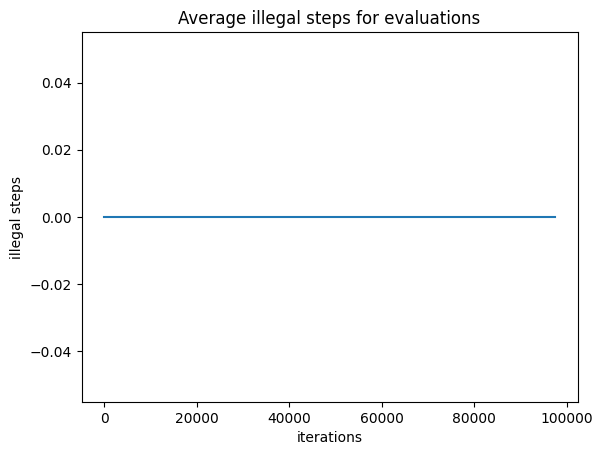

In [10]:
plt.figure()
plt.plot(eval_points, avg_illegal_steps)
plt.title("Average illegal steps for evaluations")
plt.xlabel("iterations")
plt.ylabel("illegal steps")
plt.show()

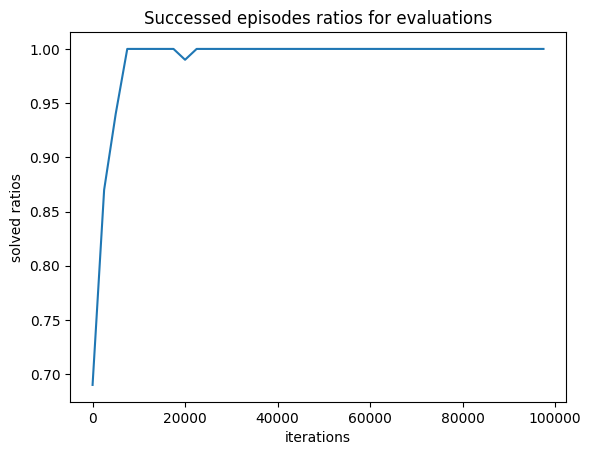

In [11]:
plt.figure()
plt.plot(eval_points, solved_ratios)
plt.title("Successed episodes ratios for evaluations")
plt.xlabel("iterations")
plt.ylabel("solved ratios")
plt.show()

### 4. Wnioski

Zaimplementowano poprawnie działający algorytm uczenia (się) ze wzmocnienim a takze stworzono agenta rozwiązującego problem *Taxi*. Z otrzymanych przebiegów śledzonych wartości, mozna wywnioskować, ze program działa poprawnie. Istotą zadania nie było badanie wpływu parametrów uczenia agenta, a dla wybranych nastaw osiągnięto zadowalający rezultat.

Postanowiono pokazać jak "nauczony" agent poradzi sobie z rozwiązywaniem problemu wybierając akcje na podstawie tablicy wiedzy w porównaniu z losowym wybieraniem akcji w danym stanie. Testy działania agenta bez wiedzy, przeprowadzono w takich samych warunkach jak dla ewaluacji z treningiem, a więc dla 100 epizodów testowych w kazdej z 40 ewaluacji oraz ograniczenia 500 ruchów na rozwiązanie epizodu.

In [12]:
(
    rand_eval_points,
    rand_avg_steps,
    rand_avg_scores,
    rand_avg_illegal_steps,
    rand_solved_ratios,
) = taxi_solver.evaluate(
    n_iters=NUM_OF_ITERATIONS,
    n_evals=NUM_OF_EVALUATIONS,
    n_episodes=NUM_OF_EPISODES_FOR_EVALUATION,
    max_solve_iters=MAX_SOLVE_ITERATIONS,
    random_action=True
)

---------- Evaluation ----------
Learning period iterations: 2500
Number of evalutaions: 40
Evaluation episodes: 100

---------- Evaluation stop #1 at iteration #1 ----------
Episode #1: steps: 385, score: -1552, illegal_steps: 132, solved: True
Episode #2: steps: 366, score: -1398, illegal_steps: 117, solved: True
Episode #3: steps: 501, score: -2058, illegal_steps: 173, solved: False
Episode #4: steps: 501, score: -1941, illegal_steps: 160, solved: False
Episode #5: steps: 501, score: -1869, illegal_steps: 152, solved: False
Episode #6: steps: 501, score: -1923, illegal_steps: 158, solved: False
Episode #7: steps: 420, score: -1542, illegal_steps: 127, solved: True
Episode #8: steps: 260, score: -932, illegal_steps: 77, solved: True
Episode #9: steps: 320, score: -1208, illegal_steps: 101, solved: True
Episode #10: steps: 501, score: -1968, illegal_steps: 163, solved: False
Episode #11: steps: 435, score: -1629, illegal_steps: 135, solved: True
Episode #12: steps: 501, score: -1878, 

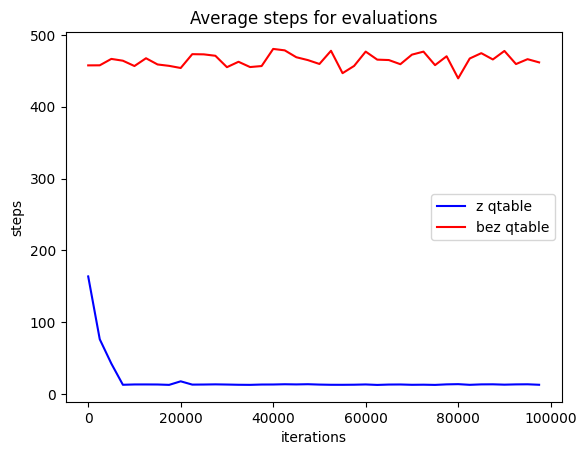

In [13]:
plt.figure()
plt.plot(eval_points, avg_steps, "b", label="z qtable")
plt.plot(rand_eval_points, rand_avg_steps, "r", label="bez qtable")
plt.legend(loc="right")
plt.title("Average steps for evaluations")
plt.xlabel("iterations")
plt.ylabel("steps")
plt.show()

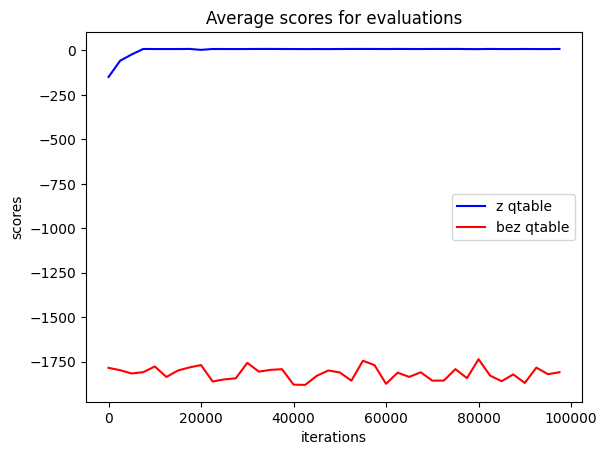

In [14]:
plt.figure()
plt.plot(eval_points, avg_scores, "b", label="z qtable")
plt.plot(rand_eval_points, rand_avg_scores, "r", label="bez qtable")
plt.legend(loc="right")
plt.title("Average scores for evaluations")
plt.xlabel("iterations")
plt.ylabel("scores")
plt.show()

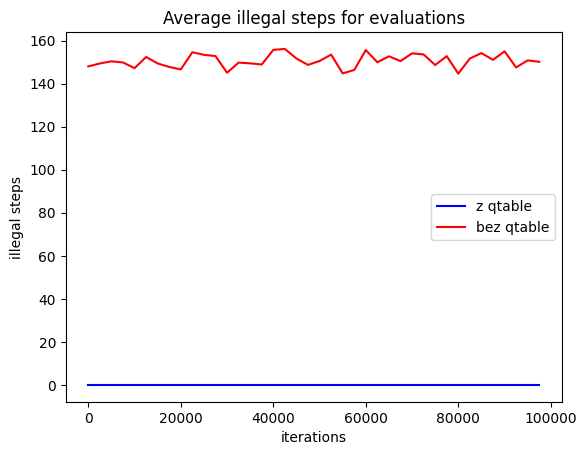

In [15]:
plt.figure()
plt.plot(eval_points, avg_illegal_steps, "b", label="z qtable")
plt.plot(rand_eval_points, rand_avg_illegal_steps, "r", label="bez qtable")
plt.legend(loc="right")
plt.title("Average illegal steps for evaluations")
plt.xlabel("iterations")
plt.ylabel("illegal steps")
plt.show()

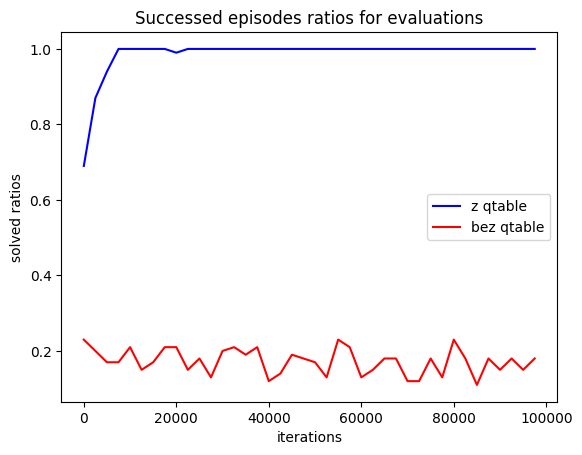

In [16]:
plt.figure()
plt.plot(eval_points, solved_ratios, "b", label="z qtable")
plt.plot(rand_eval_points, rand_solved_ratios, "r", label="bez qtable")
plt.legend(loc="right")
plt.title("Successed episodes ratios for evaluations")
plt.xlabel("iterations")
plt.ylabel("solved ratios")
plt.show()

Przeprowadzony test potwierdza poprawność działania algorytmu i dowodzi, ze agent w oczekiwany sposób uczy się środowiska.